## In this use-case, we demonstrate the capability of the CCP-tool to move beyond utilizing gene expression data and exploiting additional data modalities to predict mesoscale connectivity patterns. Specifically we incorporate long-range-projections from single-neuron reconstructions obtained from the Mouselight project of Janelia Research Campus.  
## Initially, we download the morphology data from a Neuroinformatics.nl repository, and we register them to the 3D space defined by the Allen CCF v 3.0. We then unionize the data, meaning that we average their voxel densities over their respective brain areas on a laminar level of resolution.  
## We then highlight the connection between wild-type tract tracing data, obtained from the Allen Mouse Brain Connectivity Atlas, and the reconstructed neurons in two-ways:
### 1) We use the CCP-tool to predict the tract tracing data using the morphology data on a unionized level, and visualize the predictions and the statistics related to the prediction performance of the models.   
### 2) We connect the CCP-tool to the SBA Composer and we plot the tract tracing data, represented as streamlines, overlaid with the morphology data in order to show their overlap in 3D space.

## Beginnings:
### Load all necessary ingredients from the storage

## Step 0: 
### Import the libraries / initialize the pipeline

In [1]:
import os
from subprocess import call
import pickle as pk
from IPython.display import clear_output
current_dir = os.listdir('./')
for path in os.listdir('../25 3 2019/'):
    if os.path.islink(path) is not True and path not in current_dir:
        call(['ln','-s','../25 3 2019/'+ path, path])        
from cfg import *
os.chdir('../CCP_Collab_Backup_2/')
import PrimaryLibrary as PL
imp.reload(PL)
import MorphologyLibrary as MLab
imp.reload(MLab)
import Allen_API_Library as API
imp.reload(API)
MesoPred = PL.MesoconnectomePredictor()

importing Jupyter notebook from Allen_API_Library.ipynb
importing Jupyter notebook from Allen_API_Library.ipynb


## Step I: Initialization 
### Load and Preprocess the unionized data

In [2]:
GeneExp  = h5py.File('G_Exp.hdf5', 'r')['dataset1']
ConDict  = pk.load(open('CreLineDict.pkl','rb'))

ConMat_scaled = OrderedDict()
for key in MesoPred.ConDict.keys():
    GeneExp_scaled,g_scaler,ConMat_scaled[key],c_scaler  = MesoPred.PreProcessing(GeneExp[MesoPred.params['leaf_keys'],:], 
                                      MesoPred.params,
                                      MesoPred.ConDict[key]['ConMat'][MesoPred.params['leaf_keys'],:])
         
GeneMeta       = pk.load(open('GeneMeta.pkl','r'))
clear_output()

## Step II: Extension of the CCP-tool throught the MorphologyLibrary in order to:  
### 1) Donwload the morphology data from a repository in Neuroinformatics.nl  
### 2) Register the neurons in the Allen CCF v3.0 3D reference space.
### 3) With the neurons belonging to the same space as the Allen Institute datasets/modalities, unionize the neurons such that they are represented on the level of laminarly resolved brain areas
#### To speed-up the demonstration, the estimated unionized projection densities of the neuronal morphology data are being loaded through pickle files.   
#### In case that the full iteration of the process is desired, click on the cell below and change its form from "Raw NBConvert" to "Code" 

In [3]:
ML_vol, ProjectionDensity, source_area, coord_list  = MLab.tree2volume('total')
pk.dump(ProjectionDensity, open('total_uni.pkl','wb'))
pk.dump(source_area, open('source_area.pkl','wb'))
pk.dump(coord_list, open('coord_list.pkl','wb'))
savelist = ['coord_list.pkl','source_area.pkl','total_uni.pkl']   

0
AA0001 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0001.json
1
AA0002 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0002.json
2
AA0003 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0003.json
3
AA0004 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0004.json
4
AA0005 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0005.json
5
AA0006 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0006.json
6
AA0007 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0007.json
7
AA0008 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0008.json
8
AA0009 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0009.json
9
AA0010 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0010.json
10
AA0011 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0011.json
11
AA0012 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0012.json
12
AA0013 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0013.json
13
AA0014

108
AA0109 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0109.json
109
AA0110 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0110.json
110
AA0111 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0111.json
111
AA0112 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0112.json
112
AA0113 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0113.json
113
AA0114 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0114.json
114
AA0115 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0115.json
115
AA0116 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0116.json
116
AA0117 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0117.json
117
AA0118 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0118.json
118
AA0119 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0119.json
119
AA0120 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0120.json
120
AA0121 https://neuroinformatics.nl/HBP/mouselight-viewer/jso

214
AA0215 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0215.json
215
AA0216 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0216.json
216
AA0217 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0217.json
217
AA0218 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0218.json
218
AA0219 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0219.json
219
AA0220 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0220.json
220
AA0221 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0221.json
221
AA0222 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0222.json
222
AA0223 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0223.json
223
AA0224 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0224.json
224
AA0225 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0225.json
225
AA0226 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0226.json
226
AA0227 https://neuroinformatics.nl/HBP/mouselight-viewer/jso

320
AA0321 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0321.json
321
AA0322 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0322.json
322
AA0323 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0323.json
323
AA0324 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0324.json
324
AA0325 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0325.json
325
AA0326 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0326.json
326
AA0327 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0327.json
327
AA0328 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0328.json
328
AA0329 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0329.json
329
AA0330 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0330.json
330
AA0331 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0331.json
331
AA0332 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0332.json
332
AA0333 https://neuroinformatics.nl/HBP/mouselight-viewer/jso

426
AA0427 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0427.json
427
AA0428 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0428.json
428
AA0429 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0429.json
429
AA0430 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0430.json
430
AA0431 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0431.json
431
AA0432 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0432.json
432
AA0433 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0433.json
433
AA0434 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0434.json
434
AA0435 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0435.json
435
AA0436 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0436.json
436
AA0437 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0437.json
437
AA0438 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0438.json
438
AA0439 https://neuroinformatics.nl/HBP/mouselight-viewer/jso

532
AA0533 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0533.json
533
AA0534 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0534.json
534
AA0535 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0535.json
535
AA0536 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0536.json
536
AA0537 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0537.json
537
AA0538 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0538.json
538
AA0539 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0539.json
539
AA0540 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0540.json
540
AA0541 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0541.json
541
AA0542 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0542.json
542
AA0543 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0543.json
543
AA0544 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0544.json
544
AA0545 https://neuroinformatics.nl/HBP/mouselight-viewer/jso

638
AA0639 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0639.json
639
AA0640 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0640.json
640
AA0641 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0641.json
641
AA0642 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0642.json
642
AA0643 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0643.json
643
AA0644 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0644.json
644
AA0645 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0645.json
645
AA0646 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0646.json
646
AA0647 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0647.json
647
AA0648 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0648.json
648
AA0649 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0649.json
649
AA0650 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0650.json
650
AA0651 https://neuroinformatics.nl/HBP/mouselight-viewer/jso

744
AA0745 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0745.json
745
AA0746 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0746.json
746
AA0747 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0747.json
747
AA0748 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0748.json
748
AA0749 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0749.json
749
AA0750 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0750.json
750
AA0751 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0751.json
751
AA0752 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0752.json
752
AA0753 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0753.json
753
AA0754 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0754.json
754
AA0755 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0755.json
755
AA0756 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0756.json
756
AA0757 https://neuroinformatics.nl/HBP/mouselight-viewer/jso

850
AA0851 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0851.json
851
AA0852 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0852.json
852
AA0853 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0853.json
853
AA0854 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0854.json
854
AA0855 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0855.json
855
AA0856 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0856.json
856
AA0857 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0857.json
857
AA0858 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0858.json
858
AA0859 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0859.json
859
AA0860 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0860.json
860
AA0861 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0861.json
861
AA0862 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0862.json
862
AA0863 https://neuroinformatics.nl/HBP/mouselight-viewer/jso

956
AA0957 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0957.json
957
AA0958 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0958.json
958
AA0959 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0959.json
959
AA0960 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0960.json
960
AA0961 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0961.json
961
AA0962 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0962.json
962
AA0963 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0963.json
963
AA0964 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0964.json
964
AA0965 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0965.json
965
AA0966 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0966.json
966
AA0967 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0967.json
967
AA0968 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA0968.json
968
AA0969 https://neuroinformatics.nl/HBP/mouselight-viewer/jso

1061
AA1062 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA1062.json
1062
AA1063 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA1063.json
1063
AA1064 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA1064.json
1064
AA1065 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA1065.json
1065
AA1066 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA1066.json
1066
AA1067 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA1067.json
1067
AA1068 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA1068.json
1068
AA1069 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA1069.json
1069
AA1070 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA1070.json
1070
AA1071 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA1071.json
1071
AA1072 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA1072.json
1072
AA1073 https://neuroinformatics.nl/HBP/mouselight-viewer/json/AA1073.json
1073
AA1074 https://neuroinformatics.nl/HBP/mouselig

In [4]:
ProjectionDensity = pk.load(open('total_uni.pkl','rb'))
source_area = pk.load(open('source_area.pkl','rb'))
coord_list = pk.load(open('coord_list.pkl','rb'))

## Step III: As a feature selection and assessment step prior to the actual predictions taking place, we perform pair-wise correlation between tract-tracing projection patterns and the long range projections of the neuronal morphologies in order to identify pairs with high correlation  

Text(33,0.5,'wild-type projection patterns')

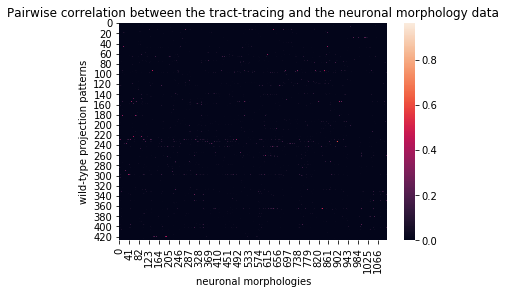

In [5]:
NeuronRed = ProjectionDensity[MesoPred.params['remaining_indices'],:]
TMP = {}
for key in ConMat_scaled.keys():
    TMP[key] = np.zeros((len(ConMat_scaled[key][0]),len(NeuronRed[0])))
    for row in range(len(ConMat_scaled[key][0])):
        for col in range(len(NeuronRed[0])):
            if len(np.unique(NeuronRed[:,col])) != 1:
                TMP[key][row,col] = sci.stats.spearmanr(ConMat_scaled[key][:,row], NeuronRed[:,col])[0]
prun_acros = [MesoPred.params['acronyms'][val] for val in MesoPred.params['remaining_indices']]

plt.figure()
sns.heatmap(NeuronRed) #, index= prun_acros)        
plt.title('Pairwise correlation between the tract-tracing and the neuronal morphology data')
plt.xlabel('neuronal morphologies')
plt.ylabel('wild-type projection patterns')

### Subcortical and cortical visualizations of the highest correlated pair between bulk tracing and reconstructed morphology data can be found here

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database',)).History will not be written to the database.
neuron 100 - type Tlx3-Cre_PL56 - injection MOs - correlation 0.744171800252
/home/ntimonidis/Brain-Connectivity Project/CCP_Collab_Backup_2
/home/ntimonidis/Brain-Connectivity Project/CCP_Collab_Backup_2


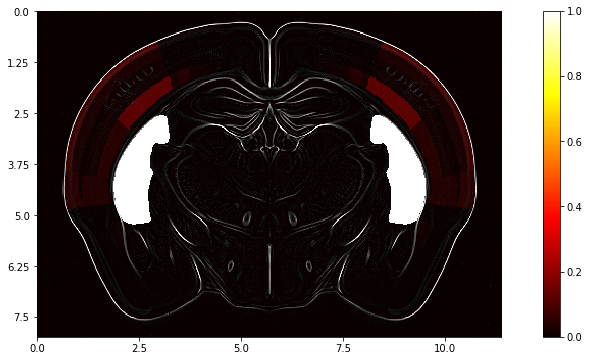

/home/ntimonidis/Brain-Connectivity Project/CCP_Collab_Backup_2
/home/ntimonidis/Brain-Connectivity Project/CCP_Collab_Backup_2


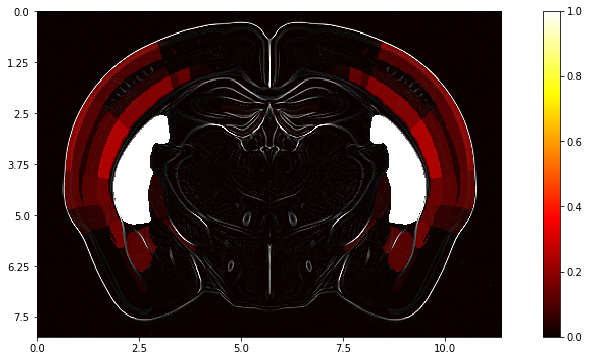

/home/ntimonidis/Brain-Connectivity Project/CCP_Collab_Backup_2
/home/ntimonidis/Brain-Connectivity Project/CCP_Collab_Backup_2


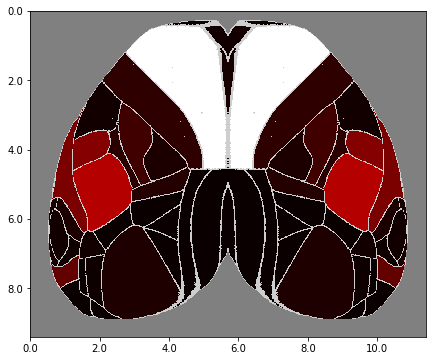

/home/ntimonidis/Brain-Connectivity Project/CCP_Collab_Backup_2
/home/ntimonidis/Brain-Connectivity Project/CCP_Collab_Backup_2


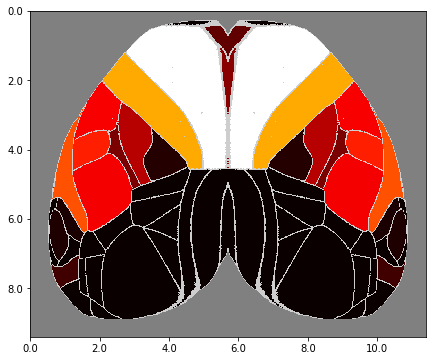

In [6]:
max_cors = np.sort([val2 for key in TMP.keys() for val in TMP[key] for val2 in val])[::-1][0:10]
for iteri in range(1):
    max_idx = [(row,col,key) for key in TMP.keys() for row in range(len(TMP[key])) \
               for col in range(len(TMP[key][0])) if TMP[key][row,col] == max_cors[iteri]]
    tracer  = MesoPred.ConDict['wild_type']['structure-abbrev'][max_idx[0][0]]
    print 'neuron {} - type {} - injection {} - correlation {}'.format(max_idx[0][1] + 1, max_idx[0][2],  \
                                                                       tracer , max_cors[iteri])
    chosen_key = max_idx[0][2]
    BP_25 = PL.BrainPlotter(resolution = 25)
    BP_25.fit(NeuronRed[:,max_idx[0][1]], chosen_indices = MesoPred.params['remaining_indices'],
             input_path = './')
    BP_25.plot_slice()
    BP_25.fit(ConMat_scaled[chosen_key][:,max_idx[0][0]], chosen_indices = MesoPred.params['remaining_indices'],
             input_path = './')

    BP_25.plot_slice()
    BP_10 = PL.BrainPlotter(resolution = 10)
    BP_10.fit(NeuronRed[:,max_idx[0][1]], chosen_indices = MesoPred.params['remaining_indices'],
             input_path = './')
    BP_10.plot_flatmap()
    BP_10.fit(ConMat_scaled[chosen_key][:,max_idx[0][0]], chosen_indices = MesoPred.params['remaining_indices'],
             input_path = './')

    BP_10.plot_flatmap()
    

## Step IV: Prediction of the all tract-tracing experiments from the Allen Mouse Brain Connectivity Atlas, 498 wild-type experiments and 14 different groups of cre-line-based experiments, using all 1100 neurons by the CCP-tool

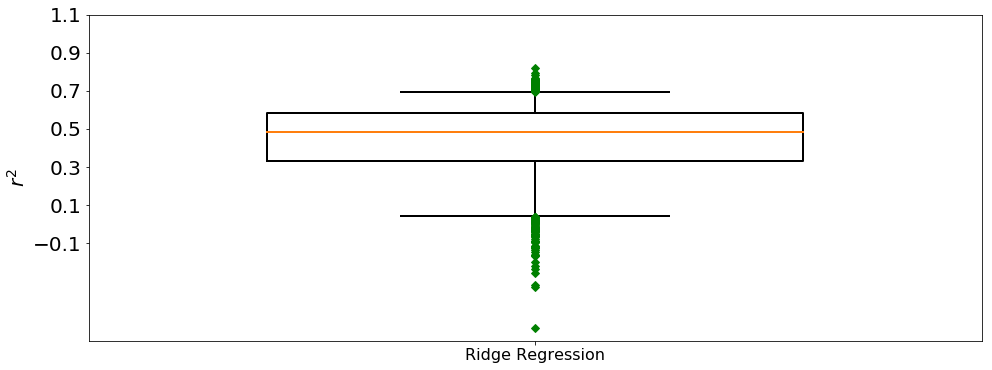

In [7]:
ridge_pred, all_scores = PL.Predictive_Shortcut(ConMat_scaled,NeuronRed)
clear_output()
PL.Custom_Boxplot(all_scores, x_ticks = ['Ridge Regression'], y_label = r'$r^2$', y_ticks = np.arange(-0.1,1.1,0.2))

## Step IV: Following the predictive pipeline, we cluster the neuronal site-coordinates of the morphology data to find dense blocks of neurons and then we plot them overlaid in 3D space with tract-tracing experiments whose souce/injected-location is close in euclidean space with the neuronal-site coordinates, in order to visually assess their spatial overlap and comprehend the predictive results. We use the SBA atlas composet for the visualization.  

### a: Clustering of the neuronal-site coordinates for identifying blocks of neurons, for which a block in the Motor area appears to be the densest one

for number of components: 4
model : Spectral - performance (cluster quality) : 0.557307907561
model : Agglomerative - performance (cluster quality) : 0.581722287505
model : KMeans - performance (cluster quality) : 0.596367096243
solutions have converged !!
model: Spectral - number of components: 4 - minimum 0.557307907561
model: Agglomerative - number of components: 4 - minimum 0.581722287505
model: KMeans - number of components: 4 - minimum 0.596367096243
Densest spatial cluster is : 2
Neuron Members: 330


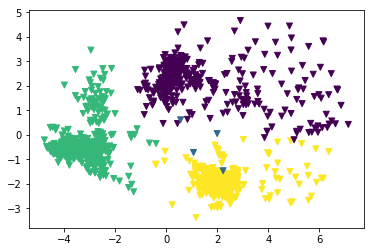

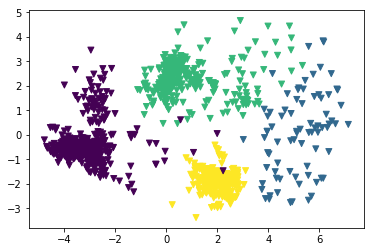

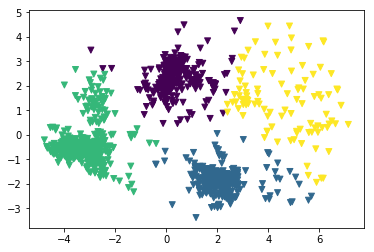

In [8]:
NeuroCoMat = np.asarray([coord_list[key][0] for key in coord_list.keys()])
cluster_solutions = MLab.NeuronClusterer(NeuroCoMat, comp_set = [4])
k_neuro_centers = cluster_solutions['KMeans'][3]
k_neuro_co_clusters = cluster_solutions['KMeans'][2]
#clear_output()

max_cls = np.argmax([len(np.nonzero(k_neuro_co_clusters == cluster)[0]) for cluster in np.unique(k_neuro_co_clusters)])
max_cls_membs  = np.nonzero(k_neuro_co_clusters == max_cls)[0]
target_indices = np.asarray([source_area[val][0] for val in max_cls_membs], int)
unique_targets = np.unique(target_indices, return_counts = True)
# The biggest subset of cluster 1 (#2) is in the Motor cortex comprised of 330 members - I select it
motor_subset = [max_cls_membs[a] for a,b in enumerate(target_indices) if 'MO' in MesoPred.params['acronyms'][b]]

print 'Densest spatial cluster is : {}\nNeuron Members: {}'.format(max_cls,len(motor_subset))

### b: Initialize an API call to the SBA composer, using a javascript-based event handler that allows the user to click on neurons and sources of tracing experiments in 3D space, which will lead to a loading of tracing and morphology streamlines that will extend from the clicked source locations

In [9]:
# Modify this routine to create a bi-directional interface
def sbaEventHandler(params_json=""):
      # When a point with an 'onclick' attribute is clicked in SBA Composer,
      # SBA Composer fires an event and includes the 'params' field of the clicked point.
      # Based on these 'params', this routine composes a new command to be sent to the viewer.
  
      params = json.loads(params_json)

      if 'AllenID' in params.keys():
        
        out,rgb   = MLab.ReadStreamlines(experimentId = params['AllenID'])
        sbaCommand = {
                "method": "Composer.import",
                "params": {
                    "message": params_json,
                    "mime": 'model/x3d',
                    "name": 'streamlines_' + str(params['AllenID']) + '.bas{sba.ABA_v3^corner[PIR,um]}.x3d',
                    "contents": MLab.streamlines2x3d(out,rgb),
                }
            }       
      elif 'MouselightID' in params.keys() and params['isCluster'] == False:
        name, url  = MLab.Neuron2Url(params['MouselightID'])
        sbaCommand = {
                "method": "Composer.import",
                "params": {
                    "mime": 'application/vnd.hbp.movi+json',
                    "name": url,
                    "url": url,
                    "bas": {
                        "orientation": "LIP",
                        "unit": "um",
                        "origin": "corner"
                    }
                }
            }        

      elif 'MouselightID' in params.keys() and params['isCluster'] == True:
        sbaCommand = {
            "method":"Composer.message",
            "params" : {
              "message": params_json
            }
          } 
      # make sure to leave this line as it is; it will be sent automagically to the viewer.
      print(json_encode(sbaCommand))

class sbaInterface_class:
    def __init__(this,sbaHost,sbaUrl):
        # In Javascript, load sbaInterface.js and create a new sbaInterface object
        display(Javascript("""
            var script = document.createElement('script');
            script.src = '{}/../js/sba-interface.js';
            script.onload = function() {{
              var eventHandler = function(params) {{ 
                var kernel = IPython.notebook.kernel;
                var callbacks = {{ 
                  iopub: {{ 
                    output: (s) => {{ 
                      window.global_sbaInterface.send(JSON.parse(s.content.text))
                    }} 
                  }} 
                }};
                var pyCommand = 'sbaEventHandler(\\''+JSON.stringify(params)+'\\')';
                kernel.execute(pyCommand,callbacks);
              }}
              window.global_sbaInterface = new sbaInterface_class('{}',eventHandler);
            }}
            document.head.appendChild(script)
        """.format(sbaHost,sbaUrl)))
        clear_output()
    
        
    def send(this,sbaCommand):
        display(Javascript("""window.global_sbaInterface.send({})""".format(json_encode(sbaCommand))))
        # Without clear_output(), sbaCommands are stored as notebook outputs
        clear_output() 
        
sbaHost = 'https://sba-dev.incf.org/composer'
sbaUrl  = sbaHost + '/index.php?template=ABA_v3&scene={"background":"FFFFFF"}' 
sbaInterface = sbaInterface_class(sbaHost,sbaUrl)        

### c: Following clustering and SBA-initializations, finally visualize the newly acquired clusters: to do so click on the green pop-up window appearing in the screen and navigate to a newly opened tab (if your browser has blocked it, allow this specific one). Lastly, when the SBA screen loads the data, feel free to navigate in 3D and to click on neuronal and tracer-sources. The clicks will load on screen a number of metadata related to the clicked body and will also load the corresponding streamlines.

In [10]:
BP = PL.BrainPlotter(resolution = 10)
cluster_sets = [i for i in range(len(np.unique(k_neuro_co_clusters)))]
MouseDict = MLab.JSON_the_cluster(NeuroCoMat, k_neuro_centers, k_neuro_co_clusters, cluster_sets, 
                             AllenData = MesoPred.ConDict)
sbaCommand = BP.Call_SBA(MouseDict, 'json')
sbaInterface.send(sbaCommand)
with open('sbaCommand_save.json','w') as fp:
        json.dump(sbaCommand,fp)